IRIS Dataset:
Accuracy Score: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Diabetes Dataset:
Accuracy Score: 0.6883116883116883
Confusion Matrix:
 [[79 20]
 [28 27]]

Heart Dataset:
Best K value: 6
Accuracy Score: 0.9344262295081968
Confusion Matrix:
 [[28  1]
 [ 3 29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93        29
           1       0.97      0.91      0.94        32

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg

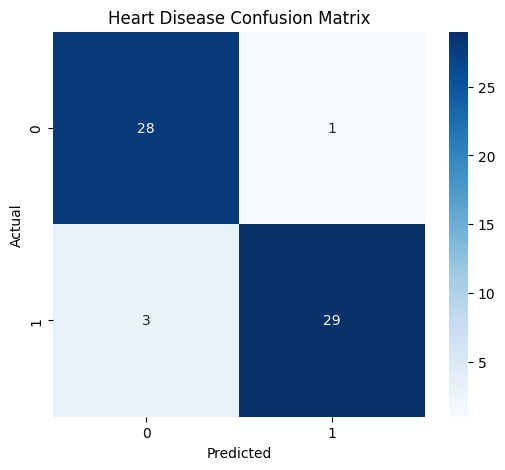

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load IRIS dataset
iris = pd.read_csv('sample_data/iris.csv')
X_iris = iris.iloc[:, :-1]
y_iris = iris.iloc[:, -1]
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Train KNN Classifier for IRIS
knn_iris = KNeighborsClassifier(n_neighbors=5)
knn_iris.fit(X_train_iris, y_train_iris)
y_pred_iris = knn_iris.predict(X_test_iris)

# Display results for IRIS
print("IRIS Dataset:")
print("Accuracy Score:", accuracy_score(y_test_iris, y_pred_iris))
print("Confusion Matrix:\n", confusion_matrix(y_test_iris, y_pred_iris))
print("Classification Report:\n", classification_report(y_test_iris, y_pred_iris))

# Load Diabetes dataset
diabetes = pd.read_csv('sample_data/diabetes.csv')
X_diabetes = diabetes.iloc[:, :-1]
y_diabetes = diabetes.iloc[:, -1]

# Feature Scaling
scaler = StandardScaler()
X_diabetes = scaler.fit_transform(X_diabetes)

X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(X_diabetes, y_diabetes, test_size=0.2, random_state=42)

# Train KNN Classifier for Diabetes dataset
knn_diabetes = KNeighborsClassifier(n_neighbors=5)
knn_diabetes.fit(X_train_diabetes, y_train_diabetes)
y_pred_diabetes = knn_diabetes.predict(X_test_diabetes)

# Display results for Diabetes dataset
print("\nDiabetes Dataset:")
print("Accuracy Score:", accuracy_score(y_test_diabetes, y_pred_diabetes))
print("Confusion Matrix:\n", confusion_matrix(y_test_diabetes, y_pred_diabetes))

# Load Heart dataset
heart = pd.read_csv('sample_data/heart.csv')
X_heart = heart.iloc[:, :-1]
y_heart = heart.iloc[:, -1]

# Feature Scaling
X_heart = scaler.fit_transform(X_heart)

X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(X_heart, y_heart, test_size=0.2, random_state=42)

# Find best k value
best_k = 1
best_score = 0
for k in range(1, 21):
    knn_heart = KNeighborsClassifier(n_neighbors=k)
    knn_heart.fit(X_train_heart, y_train_heart)
    score = knn_heart.score(X_test_heart, y_test_heart)
    if score > best_score:
        best_score = score
        best_k = k

# Train KNN Classifier for Heart dataset with best k
knn_heart = KNeighborsClassifier(n_neighbors=best_k)
knn_heart.fit(X_train_heart, y_train_heart)
y_pred_heart = knn_heart.predict(X_test_heart)

# Display results for Heart dataset
print("\nHeart Dataset:")
print("Best K value:", best_k)
print("Accuracy Score:", accuracy_score(y_test_heart, y_pred_heart))
print("Confusion Matrix:\n", confusion_matrix(y_test_heart, y_pred_heart))
print("Classification Report:\n", classification_report(y_test_heart, y_pred_heart))

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test_heart, y_pred_heart), annot=True, fmt='d', cmap='Blues')
plt.title("Heart Disease Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
